In [22]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use( 'ggplot' ) 

In [23]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import ElasticNetCV
from scipy.stats import pearsonr

In [24]:
import pandas 
import pickle 

In [25]:
# load in the pickled regression problems 

with open( 'combos.pkl', 'rb' ) as fn:
    combos = pickle.load( fn ) 
    
print( len( combos ) ) 

20


(76, 59) (76,)


/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/bagging.py:920: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


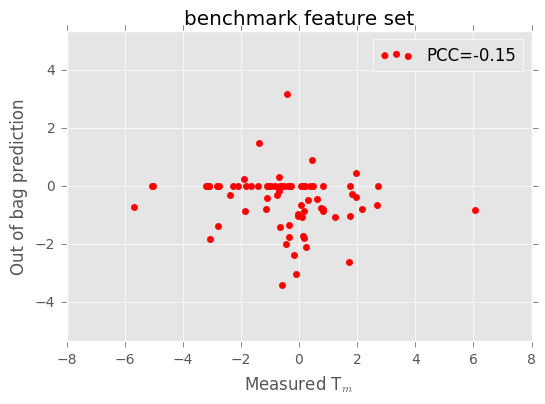

(77, 59) (77,)


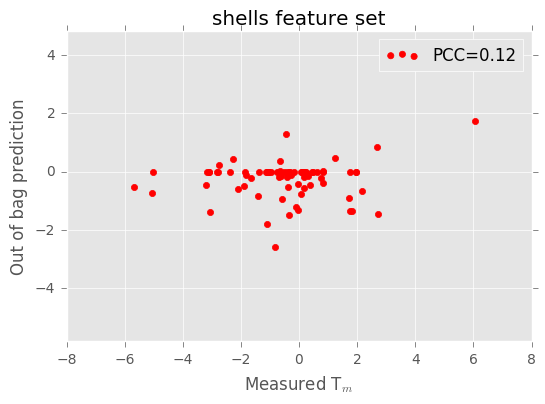

(76, 14) (76,)


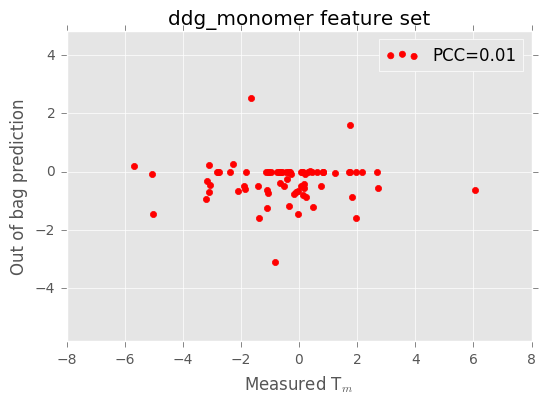

(77, 59) (77,)


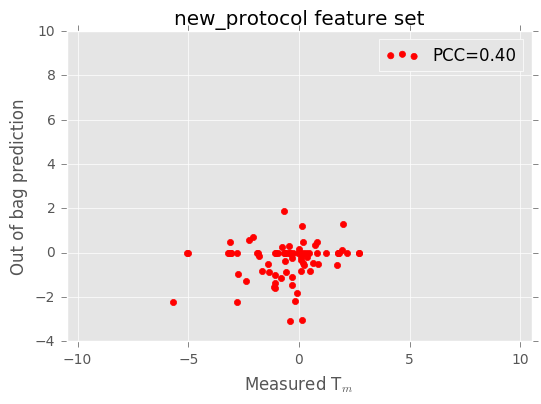

(77, 16) (77,)


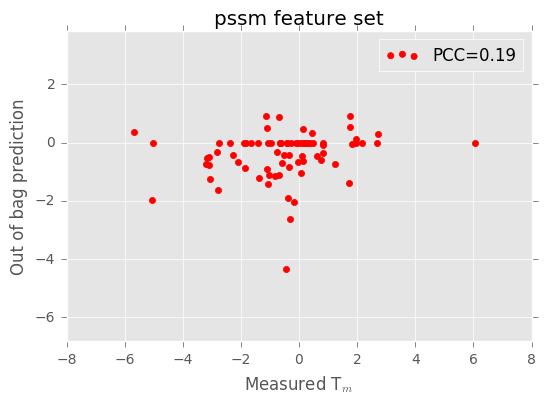

In [32]:
for nm, target, X, y, support in combos:
    if target == 'tm':
        
        print( X.shape, y.shape )  
        
        skf = StratifiedKFold( y, n_folds=10, shuffle=True ) 
        net = ElasticNetCV( cv=skf, max_iter=1e9 )
        bag = BaggingRegressor( net, n_estimators=2, n_jobs=-1, oob_score=True ) 
        bag.fit( X, y ) 
        oob_sc = bag.oob_score_  
        oob_preds = bag.oob_prediction_
        oob_r = pearsonr( y, oob_preds ) 
        
        plt.scatter( y, oob_preds, color='red' ) 
        plt.title( '{} feature set'.format( nm ) ) 
        plt.ylabel( 'Out of bag prediction' ) 
        plt.xlabel( 'Measured T$_m$' ) 
        plt.legend( [ 'PCC={0:0.2f}'.format( oob_r[0] or None ) ] )
        plt.axis( 'equal' )
        plt.show()

In [ ]:
plt.figure( figsize=( 12, 16 ) ) 

for i, (nm, target, X, y, support) in enumerate( combos ):
    
    # fit 
    skf = StratifiedKFold( y, n_folds=10, shuffle=True ) 
    net = ElasticNetCV( cv=skf, max_iter=1e9, selection='random', l1_ratio=[.1, .5, .7, .9, .95, .99, 1] )
    bag = BaggingRegressor( net, n_estimators=2, n_jobs=-1, oob_score=True ) 
    bag.fit( X, y ) 
    oob_sc = bag.oob_score_  
    preds = bag.predict( X )
    score = pearsonr( y, preds ) 
    oob_preds = bag.oob_prediction_
    oob_r = pearsonr( y, oob_preds ) 
    
    # plot 
    plt.subplot( len( combos ) / 4, 4, i+1 )

    if i == 0:
        plt.title( '$k_{\mathrm{cat}}$' )
        plt.ylabel( nm ) 
    elif i == 1:
        plt.title( '$K_\mathrm{M}$' )
    elif i == 2:
        plt.title( '$k_{\mathrm{cat}}/K_\mathrm{M}$' ) 
    elif i == 3:
        plt.title( '$T_m$' ) 
    elif i % 4 == 0:
        plt.ylabel( nm ) 
#     elif i == 10:
#         plt.xlabel( 'Measured' ) 
#     else:
#         pass

    plt.scatter( y, preds, marker='.', color='navy', alpha=1 )
    plt.scatter( y, oob_preds, marker='.', color='red', alpha=1 ) 
    #plt.legend( [ 'PCC={0:.2f} (p={1:.5f}), OOB={2}'.format( *score, oob_sc.round(2) ) ], loc='lower right', fontsize='9' ) 
    plt.legend( [ 'PCC={0:.2f}'.format( score[0] ), 'OOB={0:.2f}'.format( oob_r[0] ) ], loc='lower right', fontsize='9' ) 
    
plt.show()